In [ ]:
!pip install yfinance catboost pandas numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


##Cat Boost Algorithm

[*********************100%***********************]  1 of 1 completed


0:	learn: 18153.4338773	total: 2.73ms	remaining: 2.73s
100:	learn: 929.4951637	total: 210ms	remaining: 1.86s
200:	learn: 789.0753004	total: 392ms	remaining: 1.56s
300:	learn: 698.6764015	total: 622ms	remaining: 1.44s
400:	learn: 630.7705896	total: 831ms	remaining: 1.24s
500:	learn: 575.3268795	total: 1.03s	remaining: 1.03s
600:	learn: 527.1803545	total: 1.22s	remaining: 810ms
700:	learn: 487.3188569	total: 1.41s	remaining: 604ms
800:	learn: 453.2877254	total: 1.65s	remaining: 410ms
900:	learn: 421.4989332	total: 2.1s	remaining: 231ms
999:	learn: 393.2308696	total: 2.55s	remaining: 0us
Mean Squared Error: 779643.5941766473


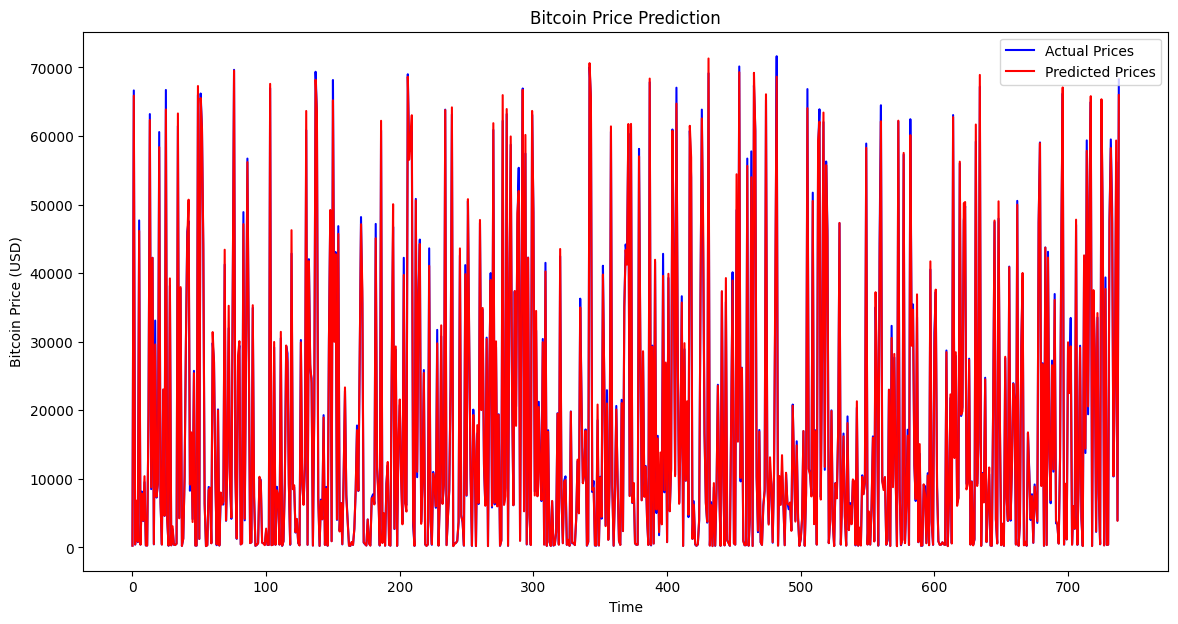

[*********************100%***********************]  1 of 1 completed

Today's Actual Bitcoin Price: $68536.94
Predicted Price for Today: $66729.53



<ipython-input-6-ec265cef9b53>:55: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(today_price)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Bitcoin Price Data
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
btc_data['Date'] = btc_data.index
btc_data['Return'] = btc_data['Close'].pct_change()
btc_data['Target'] = btc_data['Close'].shift(-1)  # Predict next day's closing price
btc_data.dropna(inplace=True)

# Features and Target
X = btc_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = btc_data['Target']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the CatBoost Model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

# Step 7: Fetch Today's Actual Price
today_data = yf.download('BTC-USD', period='1d', interval='1m')

if not today_data.empty:
    today_price = today_data['Close'].iloc[-1]  # Get the last available closing price
    latest_features = btc_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']].iloc[-1].values.reshape(1, -1)
    predicted_today_price = model.predict(latest_features)[0]  # Predict today's price

    # Convert today_price to float for formatting
    today_price = float(today_price)

    print(f"Today's Actual Bitcoin Price: ${today_price:.2f}")
    print(f"Predicted Price for Today: ${predicted_today_price:.2f}")
else:
    print("No data available for today's Bitcoin price.")


##LSTM

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0140
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0015
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 0.0013
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0012
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 9.7524e-04
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0013
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0011
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 9.2235e-04
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 8.8233e-04
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 8.7425e-04
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0010
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 9.5051e-04
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 8.7783e-04
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 7.8459e-04
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step

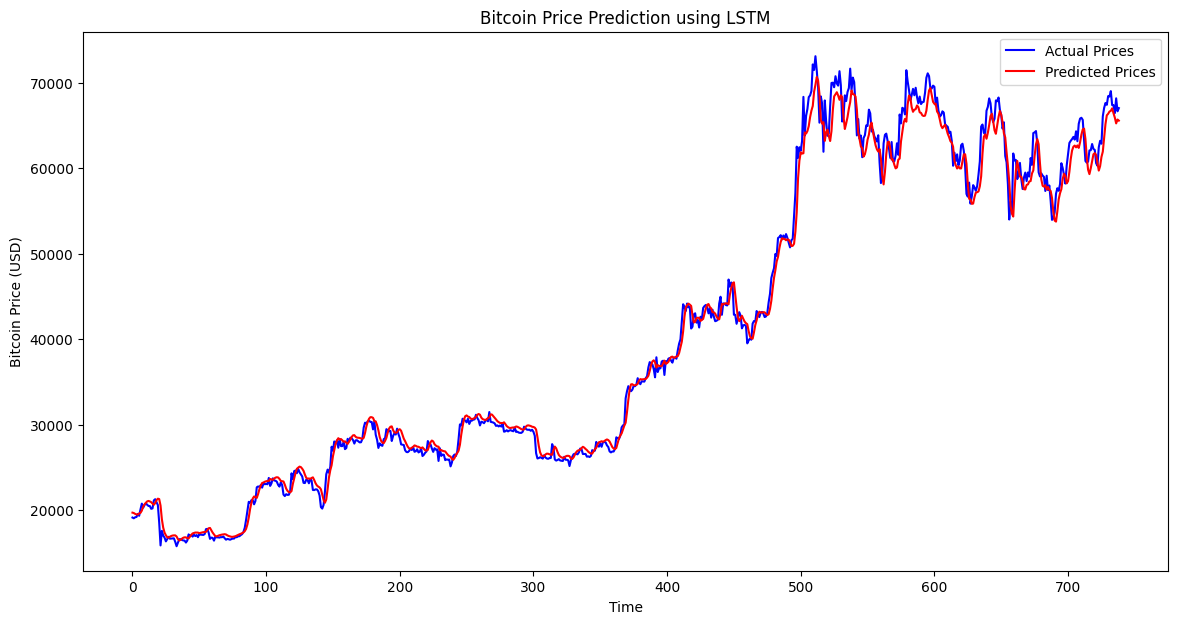

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Today's Actual Bitcoin Price: $69018.49
Predicted Price for Today: $65539.95



<ipython-input-12-6f807d23cd7b>:85: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Today's Actual Bitcoin Price: ${float(today_price):.2f}")


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Fetch Bitcoin Price Data
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
data = btc_data[['Close']]
data = data.values  # Convert to numpy array

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
x_train, y_train = [], []

# Create the training dataset
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be suitable for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 3: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the LSTM Model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Step 5: Make Predictions
# Prepare the test dataset
test_data = scaled_data[train_size - 60:]  # Use the last 60 days from training
x_test, y_test = [], data[train_size:, 0]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(data[train_size:], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

# Step 7: Print Today's Actual Price and Predicted Price
today_data = yf.download('BTC-USD', period='1d', interval='1m')

if not today_data.empty:
    today_price = today_data['Close'].iloc[-1]  # Get the last available closing price as a float
    latest_data = scaled_data[-60:]  # Last 60 days of scaled data for prediction
    latest_data = np.reshape(latest_data, (1, 60, 1))

    predicted_today_price = model.predict(latest_data)
    predicted_today_price = scaler.inverse_transform(predicted_today_price)[0][0]  # Inverse transform

    print(f"Today's Actual Bitcoin Price: ${float(today_price):.2f}")
    print(f"Predicted Price for Today: ${predicted_today_price:.2f}")
else:
    print("No data available for today's Bitcoin price.")


##BCNN

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - loss: 0.0184
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0015
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 0.0012
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0010
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - loss: 0.0011
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 0.0010
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - loss: 9.9276e-04
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - loss: 7.4717e-04
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - loss: 8.2225e-04
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - loss: 7.6950e-04
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 7.7750e-04
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 5.8716e-04
Epoch 13/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 7.3351e-04
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 6.2823e-04
Epoch 15/50


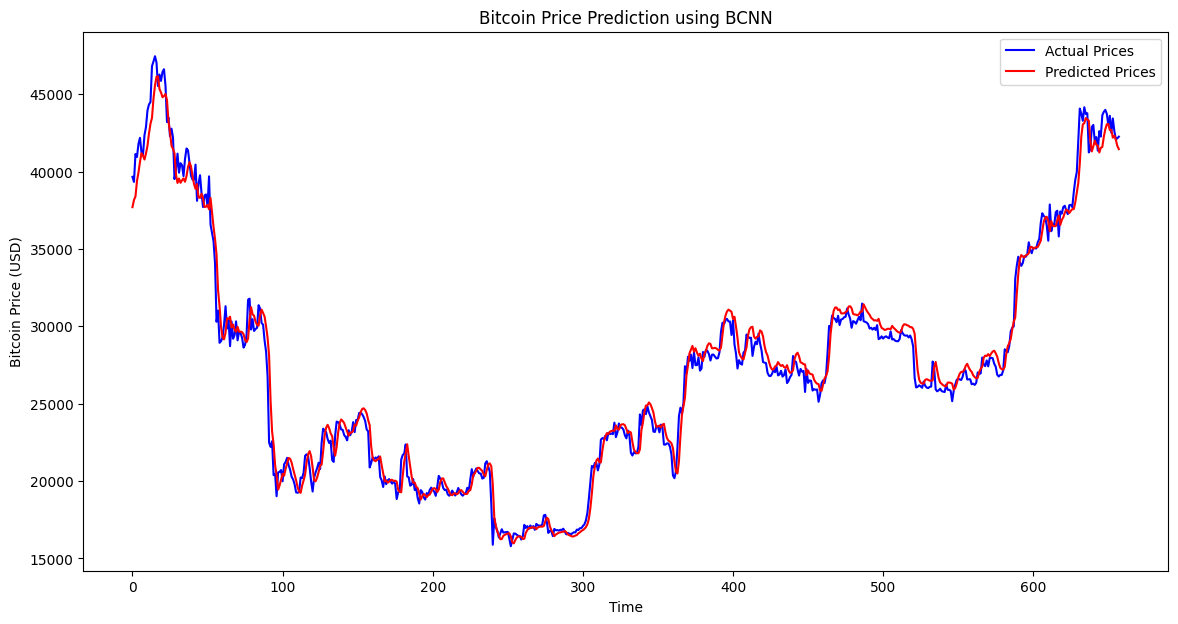

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Today's Actual Bitcoin Price: $69134.34
Predicted Price for Today: $41436.91



<ipython-input-11-ad36ac909be5>:80: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(today_data['Close'].iloc[-1])  # Convert to float


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Bidirectional, LSTM, Dropout

# Step 1: Fetch Bitcoin Price Data
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2024-01-01')

# Step 2: Preprocess the Data
data = btc_data[['Close']]
data = data.values  # Convert to numpy array

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
x_train, y_train = [], []

# Create the training dataset
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for Conv1D [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Step 3: Build the BiLSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.2))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Step 4: Train the BCNN Model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Step 5: Make Predictions
# Prepare the test dataset
test_data = scaled_data[train_size - 60:]  # Use the last 60 days from training
x_test, y_test = [], data[train_size:, 0]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(data[train_size:], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction using BCNN')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

# Step 7: Print Today's Actual Price and Predicted Price
today_data = yf.download('BTC-USD', period='1d', interval='1m')

if not today_data.empty:
    today_price = float(today_data['Close'].iloc[-1])  # Convert to float
    latest_data = scaled_data[-60:]  # Last 60 days of scaled data for prediction
    latest_data = np.reshape(latest_data, (1, 60, 1))

    predicted_today_price = model.predict(latest_data)
    predicted_today_price = scaler.inverse_transform(predicted_today_price)[0][0]  # Inverse transform

    print(f"Today's Actual Bitcoin Price: ${today_price:.2f}")
    print(f"Predicted Price for Today: ${predicted_today_price:.2f}")
else:
    print("No data available for today's Bitcoin price.")



## Random Forest

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 666417.7886529559


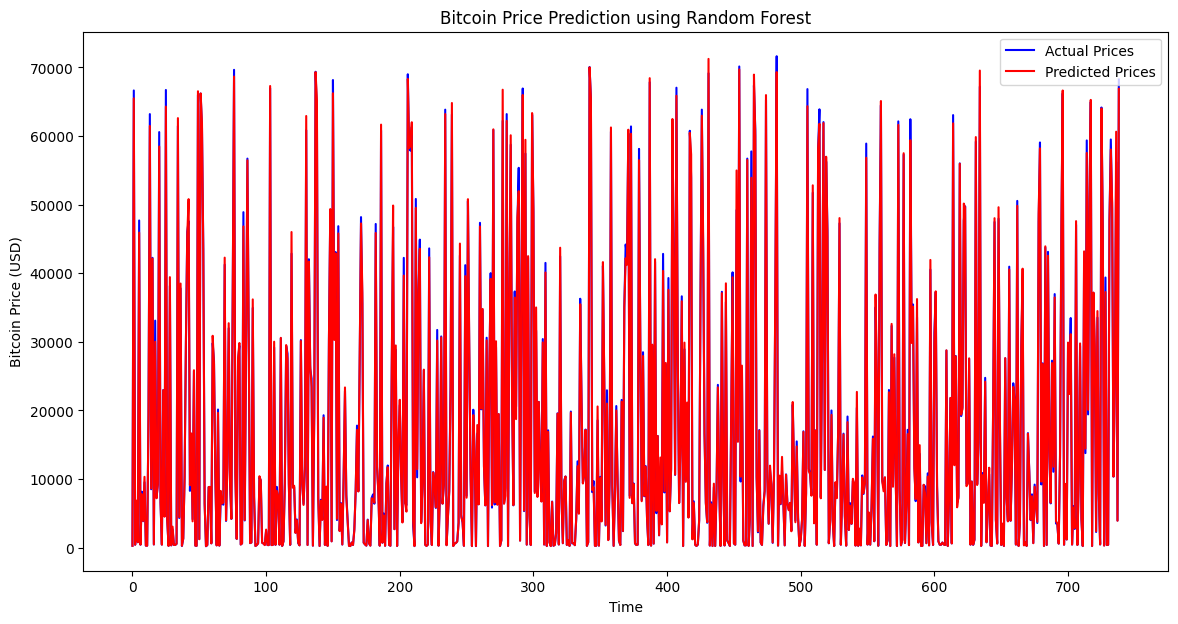

[*********************100%***********************]  1 of 1 completed

Today's Actual Bitcoin Price: $69018.49
Predicted Price for Today: $66517.29



<ipython-input-13-84e986e83d9c>:55: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(today_price)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Bitcoin Price Data
btc_data = yf.download('BTC-USD', start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
btc_data['Date'] = btc_data.index
btc_data['Return'] = btc_data['Close'].pct_change()
btc_data['Target'] = btc_data['Close'].shift(-1)  # Predict next day's closing price
btc_data.dropna(inplace=True)

# Features and Target
X = btc_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = btc_data['Target']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction using Random Forest')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

# Step 7: Fetch Today's Actual Price
today_data = yf.download('BTC-USD', period='1d', interval='1m')

if not today_data.empty:
    today_price = today_data['Close'].iloc[-1]  # Get the last available closing price
    latest_features = btc_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']].iloc[-1].values.reshape(1, -1)
    predicted_today_price = model.predict(latest_features)[0]  # Predict today's price

    # Convert today_price to float for formatting
    today_price = float(today_price)

    print(f"Today's Actual Bitcoin Price: ${today_price:.2f}")
    print(f"Predicted Price for Today: ${predicted_today_price:.2f}")
else:
    print("No data available for today's Bitcoin price.")
